## Lab 6: Examining the Therapeutic Touch

Welcome to Lab 6!

After such an extensive introduction to programming for data science, we are finally moving into the section of the course where we can apply our new skils to answer real questions.  

In this lab, we'll use testing techniques that were introduced in lecture to test the idea of the therapeutic touch, the idea that some practictioners can feel and massage your human energy field. 

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# These lines load the tests.
from client.api.notebook import Notebook
ok = Notebook('lab06.ok')
_ = ok.submit()

Assignment: Assessing Models: Examining the Therapeutic Touch
OK, version v1.12.5



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab06.ipynb'.
Performing authentication
Please enter your bCourses email.
bCourses email: shivanijpatel@berkeley.edu

Copy the following URL and open it in a web browser. To copy,
highlight the URL, right-click, and select "Copy".

https://okpy.org/client/login/

After logging in, copy the code from the web page, paste it below,
and press Enter. To paste, right-click and select "Paste".

Paste your code here: x0OYSafjEKpYIybS5GgjvwTcepOiXv
Successfully logged in as shivanijpatel@berkeley.edu
Submit... 100% complete
Submission successful for user: shivanijpatel@berkeley.edu
URL: https://okpy.org/cal/data8/sp19/lab06/submissions/Mw9GM3



### What is the Therapeutic Touch

The Therapeutic Touch (TT) is the idea that everyone can feel the Human Energy Field (HEF) around individuals. Certain practictioners claim they have the ability to feel the HEF and can massage it in order to promote health and relaxation in individuals. Those who practice TT have described different people's HEFs as "warm as Jell-O" and "tactile as taffy". 

TT was a popular technique used throughout the 20th century that was toted to be a great way to bring balance to a person's health. 

### Emily Rosa

[Emily Rosa](https://en.wikipedia.org/wiki/Emily_Rosa) was a 4th grade student who had wide exposure to the world of TT due to her parents. Her parents were both medical practitioners and skeptics of the idea of TT. 

For her 4th grade science fair project, Emily decided to test whether or not TT practitioners could truly interact with a person's HEF. 

**Question 1:** Discuss with the individuals around you how you would set up an experiment to test this.

For this experiment we need to create two randomly selected groups with large sample sizes. One group will serve as a control while the other will be the experimental. Both groups would be asked to sit in front of a screen that divides the experimenter and the subject. In the control group the subjects will talk to the experimenter using the neutral therapy questions. The experimental group will place there hands through a hole in the divider and hold hands with the experimenter. They will also be asked the questions. Both groups will answer a set of baseline questions with scales from 1-10 and after the experiment, they will answer follow-up questions to see if there is significance. Repetition of this experiment will ensure reliable averages. If 70% or above of the participants show improvement through TT, then there is significance in TT.

### Emily's Experiment

Emily's experiment was clean, simple, and effective. Due to her parents' occupations in the medical field, she had wide access to people who claimed to be TT practitioners. 

Emily took 21 TT practitioners and used them for her science experiment. She would take a TT practitioner and ask them to extend their hands through a screen (which they can't see through). Emily would be on the other side and would flip a coin. Depending on how the coin landed, she would put out either her left hand or her right hand. The TT practitioner would then have to correctly answer which hand Emily put out. Overall, through 210 samples, the practitioner picked the correct hand 44% of the time. 

Emily's main goal here was to test whether or not the TT practicioners' guesses were random, like the flip of a coin. In most medical experiments, this is the norm. We want to test whether or not the treatment has an effect, *not* whether or not the treatment actually works. 

We will now begin to formulate this experiment in terms of the terminology we learned in this course. 

**Question 2**: What is Emily's hypothesis for the experiment? What is the alternative hypothesis? Discuss with students around you to come to a conclusion. 


Emily's experiment shows 50/50 chance like the flip of a coin therefore the higher the chance for one side to be right shows signficance


**Your Answer Here:**

Emily's Hypothesis: 

Alternative Hypothesis: 

**Question 3:** Remember that the practitioner got the correct answer 44% of the time. According to Emily's hypothesis, on average, what proportion of times do we expect the practitioner to guess the correct hand? Make sure your answer is between 0 and 1. 

In [2]:
expected_correct = 0.5
expected_correct

0.5

In [3]:
_ = ok.grade('q3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The goal now is to see if our deviation from this expected proportion of correct answers is due to something other than chance. 

**Question 4:** What is a statistic that we can use to assess Emily's model? Assign `valid_stat` to an array of integer(s) representing the following options: 

1. The difference of the expected percent correct and the actual percent correct
2. The absolute difference of the expected percent correct and the actual percent correct
3. The sum of the expected percent correct and the actual percent correct

There may be more than one correct answer. 

In [4]:
valid_stat = make_array(2)

In [5]:
_ = ok.grade('q4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 5:** Define the function `statistic` which takes in an expected proportion and an actual proportion, and returns the value of the statistic chosen above. Assume that you are taking in proportions, but you want to return your answer as a percentage. 

*Hint:* Remember we are asking for a **percentage**, not a proportion. 

In [6]:
#The absolute difference of the expected 
#percent correct and the actual percent correct
def statistic(expected_prop, actual_prop):
    return abs(expected_prop-actual_prop)*100

In [7]:
_ = ok.grade('q5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 6:** Use your newly defined function to calculate the observed statistic from Emily's experiment. 

In [8]:
observed_statistic = statistic(.5,.44)
observed_statistic

6.0

In [9]:
_ = ok.grade('q6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Is this observed statistic consistent under Emily’s model? Or is the deviation from the expected proportion due to something other than chance?**

In order to answer this question, we must simulate the experiment as though Emily's hypothesis was true, and calculate the statistic per simulation.

**Question 7:** To begin simulating, we should start by creating an array with two items in it. The first item should be the proportion of times, assuming that Emily's hypothesis is true, a TT practictioner picks the correct hand. The second item should be the proportion of times, under the same assumption, that the TT practicioner picks the incorrect hand. Assign `model_proportions` to this array. 

After this, use the `sample_proportions` function to simulate Emily running through this experiment 210 times (as done in real life), and assign the proportion of *correct answers* to `simulation_proportion`. Lastly, define `one_statistic` to the statistic of this one simulation. 

*Hint:* `sample_proportions` usage can be found here [here](http://data8.org/sp19/python-reference.html)

In [11]:
model_proportions = make_array(0.5,0.5)
simulation_proportion = sample_proportions(210, model_proportions).item(0)
one_statistic = abs(100*simulation_proportion-50)
one_statistic

1.4285714285714235

In [12]:
_ = ok.grade('q7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 8:** Let's now see what the distribution of statistics is actually like under Emily's model. 

Define the function `simulation_and_statistic` to take in the number of times we want to run the experiment (`num_guesses`), the `model_proportions` array, and the expected proportion of times a TT practitioner would guess correctly under Emily's model. The function should simulate Emily running through the experiment 210 times and return the statistic of this one simulation. 

Using this function, assign `simulated_statistics` to an array of 1000 statistics that you simulated assuming Emily's hypothesis is true. 

*Hint:* This should follow the same pattern as normal simulations, in combination with the code you did in the previous problem.  

In [21]:
def simulation_and_statistic(num_guesses, model_proportions, expected_correct):
    '''Simulates Emily running through this experiment 210 times.
    Returns one statistic from the simulation.'''
    return abs(100*sample_proportions(num_guesses, model_proportions).item(0)-50)
simulation_and_statistic(210, make_array(0.5,0.5), 50)

2.857142857142861

In [23]:
def simulation_and_statistic(num_guesses, model_proportions, expected_correct):
    '''Simulates Emily running through this experiment 210 times.
    Returns one statistic from the simulation.'''
    return abs(100*sample_proportions(num_guesses, model_proportions).item(0)-50)

num_repetitions = 1000
num_guesses = 210

simulated_statistics = make_array()
model_proportions = make_array(0.5,0.5)

for x in np.arange(num_repetitions):
    one_stat = abs(100*sample_proportions(num_guesses, model_proportions).item(0)-50)
    simulated_statistics = np.append(simulated_statistics, one_stat)
simulated_statistics

array([ 0.95238095,  0.47619048,  0.95238095,  3.33333333,  5.71428571,
        0.95238095,  2.38095238,  0.95238095,  1.42857143,  0.        ,
        6.19047619,  1.42857143,  2.38095238,  1.9047619 ,  2.38095238,
        1.9047619 ,  2.38095238,  5.71428571,  0.47619048,  2.38095238,
        0.95238095,  0.95238095,  3.33333333,  0.        ,  0.95238095,
        1.9047619 ,  1.42857143,  0.        ,  3.80952381,  1.42857143,
        3.33333333,  4.28571429,  5.71428571,  6.19047619,  2.85714286,
        0.        ,  1.42857143,  2.38095238,  0.47619048,  0.47619048,
        6.19047619,  0.95238095,  1.9047619 ,  4.76190476,  0.95238095,
        8.0952381 ,  0.47619048,  0.95238095,  1.42857143,  2.85714286,
        0.95238095,  1.42857143,  0.95238095,  1.9047619 ,  2.38095238,
        3.33333333,  0.95238095,  0.47619048,  7.14285714,  1.9047619 ,
        0.95238095,  6.66666667,  3.80952381,  1.42857143,  2.38095238,
        0.47619048,  1.9047619 ,  4.76190476,  0.95238095,  1.90

In [24]:
_ = ok.grade('q8')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



Let's view the distribution of the simulated statistics under Emily's hypothesis, and visually compare how the observed statistic lies against the rest. 

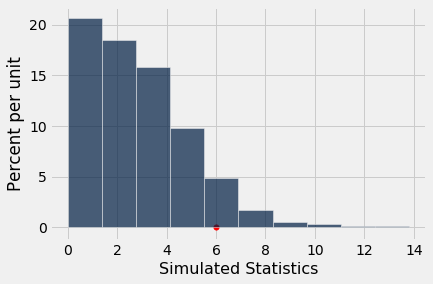

In [25]:
t = Table().with_column('Simulated Statistics', simulated_statistics)
t.hist()
plt.scatter(observed_statistic, 0, color='red', s=30);

We can make a visual argument as to whether we believe the observed statistic is consistent with Emily’s hypothesis. Formally, data scientists look at the area at or to the right of the observed statistic, and if that’s small (less than 5%), we declare it to be inconsistent.

**Question 9:** Calculate the proportion of simulated statistics greater than or equal to the observed statistic. 

In [26]:
proportion_greater_or_equal = sum(simulated_statistics>=observed_statistic)/1000
proportion_greater_or_equal

0.077

In [27]:
_ = ok.grade('q9')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



If the proportion of simulated statistics greater than or equal to the observed statistc is less than or equal to .05, then this is in favor of our alternative and we reject Emily's hypothesis. Otherwise, we do not have enough evidence against Emily's hypothesis. Note that this does **not** say that we accept Emily's hypothesis, but rather, that we just **fail to reject it**. 

This should help you make your own conclusions about Emily Rosa's experiment. 

Therapeutic touch fell out of use after this experiment, which was eventually accepted into one of the premier medical journals. TT practitioners hit back and accused Emily and her family of tampering with the results, while some claimed that Emily's bad spiritual mood towards therapeutic touch made it difficult to read her HEF. Whatever it may be, Emily's experiment is a classic example about how anyone, with the right resources, can test anything they want!

Think to yourself and be prepared to talk with your learning assistant and TA about the following questions as you get checked off: 

1. Do we reject Emily's hypothesis, or fail to reject it? 
2. What does this mean in terms of Emily's experiment? Do the TT practitioners' answers follow an even chance model or is there something else at play? 

Lastly, make sure to run all the tests (the next cell has a shortcut for that), save your work, and run the submit cell before you leave lab to ensure your assignment gets graded! 

In [28]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

In [29]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'lab06.ipynb'.
Submit... 100% complete
Submission successful for user: shivanijpatel@berkeley.edu
URL: https://okpy.org/cal/data8/sp19/lab06/submissions/gZk37r

